In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Warning : j'ai enlevé les data du répertoire !

### First let's use the imdb name database to create dataframe (or dict) of actress and actors with their birthdate

In [2]:
d=pd.read_csv('namedata.tsv',delimiter='\t')

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9286475 entries, 0 to 9286474
Data columns (total 6 columns):
nconst               object
primaryName          object
birthYear            object
deathYear            object
primaryProfession    object
knownForTitles       object
dtypes: object(6)
memory usage: 425.1+ MB


In [4]:
# we don't need those
d=d.drop('deathYear',axis=1)
d=d.drop('knownForTitles',axis=1)

In [5]:
d.isna().sum()

nconst                     0
primaryName                0
birthYear                  0
primaryProfession    1707429
dtype: int64

In [6]:
d=d.dropna()

In [7]:
# we plan to work on birthYear so we only keep data with a valid birthYear
d=d[d.birthYear != '\\N']

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425496 entries, 0 to 9285770
Data columns (total 4 columns):
nconst               425496 non-null object
primaryName          425496 non-null object
birthYear            425496 non-null object
primaryProfession    425496 non-null object
dtypes: object(4)
memory usage: 16.2+ MB


In [9]:
# we plan to compute the age of actress and actors. Let's convert birthYear from string to integer.
d.birthYear = pd.to_numeric(d.birthYear).astype(np.int64)

In [10]:
#we keep only actor and actresses
da=d[(d['primaryProfession'].str.contains('actress')) | (d['primaryProfession'].str.contains('actor'))]

In [11]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293063 entries, 0 to 9285635
Data columns (total 4 columns):
nconst               293063 non-null object
primaryName          293063 non-null object
birthYear            293063 non-null int64
primaryProfession    293063 non-null object
dtypes: int64(1), object(3)
memory usage: 11.2+ MB


In [12]:
df=da[da['primaryProfession'].str.contains('actress')]
dh=da[da['primaryProfession'].str.contains('actor')]

In [13]:
print('la base de données contient',len(df),'actrices et',len(dh),'acteurs')
print('cela fait {:.0%} de femmes et {:.0%} d\'hommes ou encore 10 femmes pour {:.0f} hommes'.format(len(df)/(len(df)+len(dh)),len(dh)/(len(df)+len(dh)),10*len(dh)/len(df)))

la base de données contient 113982 actrices et 179081 acteurs
cela fait 39% de femmes et 61% d'hommes ou encore 10 femmes pour 16 hommes


In [14]:
del d

### Now let's load and clean the principals and movies databases

In [15]:
# first the principals
d=pd.read_csv('principalsdata.tsv',delimiter='\t')

In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413821 entries, 0 to 33413820
Data columns (total 6 columns):
tconst        object
ordering      int64
nconst        object
category      object
job           object
characters    object
dtypes: int64(1), object(5)
memory usage: 1.5+ GB


In [17]:
# an example
d.iloc[100]

tconst        tt0000042
ordering              1
nconst        nm0617588
category       director
job                  \N
characters           \N
Name: 100, dtype: object

In [18]:
# among the principals we are only interested in actors and actresses 
db=d[(d.category=='actress') | (d.category=='actor')]
db=db.drop('job',axis=1)

In [19]:
del d

In [20]:
# now the movies
d=pd.read_csv('basicsdata.tsv',delimiter='\t')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820718 entries, 0 to 5820717
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: int64(1), object(8)
memory usage: 399.7+ MB


In [21]:
print(d.iloc[10000])

tconst              tt0010134
titleType               movie
primaryTitle      Fool's Gold
originalTitle     Fool's Gold
isAdult                     0
startYear                1919
endYear                    \N
runtimeMinutes             \N
genres                  Drama
Name: 10000, dtype: object


In [22]:
#we are looking for nonAdult movies
d=d[d.isAdult==0]
d=d[d.titleType=='movie']
# we don't neeed those
d=d.drop('originalTitle',axis=1)
d=d.drop('isAdult',axis=1)
d=d.drop('endYear',axis=1)
d=d.drop('runtimeMinutes',axis=1)
d=d.drop('titleType',axis=1)

In [23]:
# we plan to work on startYear so we only keep data with a valid startYear
d=d[d.startYear != '\\N']

In [24]:
# we plan to compute the age of actress and actors at the time of filming. Let's convert startYear from string to integer.
d.startYear = pd.to_numeric(d.startYear).astype(np.int64)

In [25]:
#we want only fiction movies with live actors and actresses
d=d[~(d['genres'].str.contains('Short|Talk-Show|Documentary|Animation|Reality-TV'))]

In [27]:
d=d[d.genres != '\\N']

In [28]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284239 entries, 8 to 5820627
Data columns (total 4 columns):
tconst          284239 non-null object
primaryTitle    284239 non-null object
startYear       284239 non-null int64
genres          284239 non-null object
dtypes: int64(1), object(3)
memory usage: 10.8+ MB


In [42]:
# we want to control for region. For this we will need to add look at the akas data
ad=pd.read_csv('akasdata.tsv',delimiter='\t',dtype= {'titleId': str, '‘ordering': np.int32, '‘title': str, 'region': str, 'language':str, 'types' : str, 'attributes' : str, 'isOriginalTitle' : str})
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661438 entries, 0 to 3661437
Data columns (total 8 columns):
titleId            object
ordering           int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtypes: int64(1), object(7)
memory usage: 223.5+ MB


In [43]:
ad.isOriginalTitle.value_counts()

0     3273424
1      385884
\N       2130
Name: isOriginalTitle, dtype: int64

In [47]:
ad1=ad[ad.isOriginalTitle == '1']
ad1.region.value_counts()

\N     385868
US          7
XWW         4
GB          1
CN          1
BR          1
DK          1
HK          1
Name: region, dtype: int64

#alas the "isOriginalTitle" field is not to be trusted. 

In [ ]:
del ad1

In [55]:
ad.language.value_counts()[0:5]

\N    3387578
en     147898
ru      22974
fr      20881
bg      19560
Name: language, dtype: int64

can't use language neither

In [57]:
ad.region.value_counts()[0:5]

US    937264
\N    439538
GB    257471
FR    146862
JP    118750
Name: region, dtype: int64

In [60]:
ad.ordering.value_counts()[0:5]

1    2074751
2     385328
3     345978
4     167204
5     111149
Name: ordering, dtype: int64

We will use region instead, and ordering to avoid duplicates, hoping ordering =1 means original title

In [63]:
ad1=ad[ad.ordering==1]

In [65]:
ad1=ad1[ad1.region != '\\N']

In [66]:
print(' Films français  :',len(ad1[ad1.region=='FR']),'\n','Films américains:',len(ad1[ad1.region=='US']))

 Films français  : 75463 
 Films américains: 771100


In [69]:
ad1=ad1[['titleId','region']]
ad1.rename(columns={'titleId':'tconst'}, inplace=True)

In [70]:
ad1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943827 entries, 0 to 3661435
Data columns (total 2 columns):
tconst    object
region    object
dtypes: object(2)
memory usage: 44.5+ MB


In [74]:
d=pd.merge(d,ad1,on='tconst')
d=d.drop_duplicates()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218952 entries, 0 to 218951
Data columns (total 5 columns):
tconst          218952 non-null object
primaryTitle    218952 non-null object
startYear       218952 non-null int64
genres          218952 non-null object
region          218949 non-null object
dtypes: int64(1), object(4)
memory usage: 10.0+ MB


218k films have region among the 284k we initialy got. That's fairly acceptable

In [78]:
d.region.value_counts()[0:10]

US     46302
IN     19855
XWW    10740
GB      8286
BR      7353
FR      7248
PH      7066
JP      6814
MX      6282
IT      6196
Name: region, dtype: int64

In [ ]:
e=d[d.startYear>1989]
e.region.value_counts()[0:10]

According to web comments, XWW means "worldwide" 

let's summarize : 
d is a dataframe of 218k nonadult fiction movies with id (tconst) ans startYear (integer)
db is a dataframe of millions of "principals" (i.e. roles) with id (tconst) of the movie, id (nconst) of the actress/actor
df and dh are dataframe of 119k actresses/173kactors with id (nconst) and birthYear (integer)

##### Let's merge d and db so as to integrate the startYear of the movie in the dataframe and drop principals with no startYear

In [88]:
#d=d.drop('primaryTitle', axis=1)
db=pd.merge(db,d,on='tconst')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960442 entries, 0 to 960441
Data columns (total 9 columns):
tconst          960442 non-null object
ordering        960442 non-null int64
nconst          960442 non-null object
category        960442 non-null object
characters      960442 non-null object
primaryTitle    960442 non-null object
startYear       960442 non-null int64
genres          960442 non-null object
region          960434 non-null object
dtypes: int64(2), object(7)
memory usage: 73.3+ MB


In [89]:
print(len(db.nconst.unique()))

362888


In [90]:
print(len(db.tconst.unique()))

212341


In [91]:
print(len(db))

960442


In [92]:
# we merge with the actor/actress bases to get acting people birthYear
db=pd.merge(db,da,on='nconst',validate="m:1")
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547223 entries, 0 to 547222
Data columns (total 12 columns):
tconst               547223 non-null object
ordering             547223 non-null int64
nconst               547223 non-null object
category             547223 non-null object
characters           547223 non-null object
primaryTitle         547223 non-null object
startYear            547223 non-null int64
genres               547223 non-null object
region               547221 non-null object
primaryName          547223 non-null object
birthYear            547223 non-null int64
primaryProfession    547223 non-null object
dtypes: int64(3), object(9)
memory usage: 54.3+ MB


In [93]:
# calculons l'age au moment du role
db['age']=db['startYear']-db['birthYear']

In [94]:
print(db[db.age <= 0].count())

tconst               36
ordering             36
nconst               36
category             36
characters           36
primaryTitle         36
startYear            36
genres               36
region               36
primaryName          36
birthYear            36
primaryProfession    36
age                  36
dtype: int64


In [95]:
print(db[db.age > 100].count())

tconst               20
ordering             20
nconst               20
category             20
characters           20
primaryTitle         20
startYear            20
genres               20
region               20
primaryName          20
birthYear            20
primaryProfession    20
age                  20
dtype: int64


In [96]:
# les erreurs ne sont pas nombreuses on peut les supprimer sans autre forme de procès
db=db[db.age >0]
db=db[db.age<101]

In [97]:
#ne gardons que les films déjà tournés
db=db[db.startYear<2020]

In [98]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546931 entries, 0 to 547222
Data columns (total 13 columns):
tconst               546931 non-null object
ordering             546931 non-null int64
nconst               546931 non-null object
category             546931 non-null object
characters           546931 non-null object
primaryTitle         546931 non-null object
startYear            546931 non-null int64
genres               546931 non-null object
region               546929 non-null object
primaryName          546931 non-null object
birthYear            546931 non-null int64
primaryProfession    546931 non-null object
age                  546931 non-null int64
dtypes: int64(4), object(9)
memory usage: 58.4+ MB


### ajoutons les informations de rating sur les films

In [99]:
d=pd.read_csv('ratingsdata.tsv',delimiter='\t')

In [101]:
d=d.drop_duplicates()
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929784 entries, 0 to 1487005
Data columns (total 3 columns):
tconst           929784 non-null object
averageRating    929784 non-null float64
numVotes         929784 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.4+ MB


In [102]:
# let's add the rating
dbr=pd.merge(db,d,on='tconst',how='left')

In [106]:
dbr.describe()

,ordering,startYear,birthYear,age,averageRating,numVotes
count,546931.000000,546931.000000,546931.000000,546931.000000,391003.000000,3.910030e+05
mean,3.093419,1973.705502,1935.322255,38.383248,6.058252,5.888499e+03
std,2.255731,30.813972,32.003457,13.447615,1.177250,4.238728e+04
min,1.000000,1900.000000,1830.000000,1.000000,1.000000,5.000000e+00
25%,2.000000,1951.000000,1912.000000,28.000000,5.400000,2.100000e+01
50%,3.000000,1975.000000,1937.000000,36.000000,6.200000,8.700000e+01
75%,4.000000,2003.000000,1961.000000,47.000000,6.900000,5.330000e+02
max,10.000000,2019.000000,2013.000000,100.000000,10.000000,2.082493e+06


In [120]:
reg='GB'
dbr2=dbr[dbr.startYear>1999]
print(len(dbr2[dbr2.region==reg]))
dbr2[dbr2.region==reg].isna().sum()

4445


tconst                 0
ordering               0
nconst                 0
category               0
characters             0
primaryTitle           0
startYear              0
genres                 0
region                 0
primaryName            0
birthYear              0
primaryProfession      0
age                    0
averageRating        695
numVotes             695
dtype: int64

In [123]:
print(dbr.iloc[100000])

tconst                            tt0048745
ordering                                  4
nconst                            nm0285264
category                              actor
characters                   ["Alan Doran"]
primaryTitle         Treasure of Ruby Hills
startYear                              1955
genres                              Western
region                                   GR
primaryName                      Dick Foran
birthYear                              1910
primaryProfession          actor,soundtrack
age                                      45
averageRating                           5.8
numVotes                                 85
Name: 100000, dtype: object


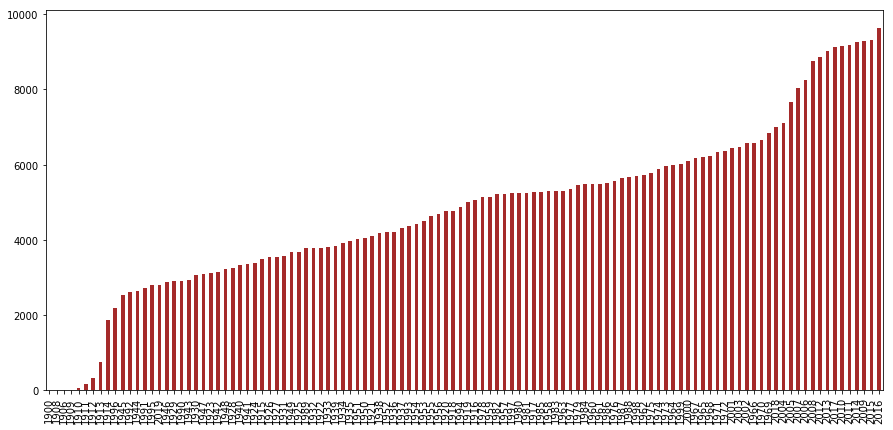

In [124]:
plt.figure(figsize=(15,7))
dbr['startYear'].value_counts(ascending=True).plot(kind='bar',color='brown')

#### note that in this dataframe lines are roles (filmxactor/actress), not films

In [125]:
dbr.to_csv("imdb_dbr.csv")

A FAIRE :
parmi les rôles combien sont pour des nouveaux venus
longueur moyenne de la "carrière" par sexe, distribution des longueurs de carrière
distribution du nombre de grands roles, par sexe
distribution des ages de premier role, par sexe
distribution des ages de dernier role, par sexe
proba de retrouver un role dans les n prochaines années, par sexe
proba de retrouver un role dans les 5 prochaines années en fonction de l'age, par sexe  
subtitles for hearing impaired : diff de thématiques / phrases représentatives hommes/femmes

#vu après : https://minimaxir.com/2018/07/imdb-data-analysis/

In [126]:
del dbr2
del dbr
del d